<div style="margin-bottom: 15px; padding: 15px; color: #31708e; background-color: #d9edff; border: 1px solid #bce8f1; border-radius: 5px;">
    
<font size=+2>My Information:</font></b>

  Name</b>: [Venkata Sai Kumar Gottumukkala]
  </br>

  Student ID Number</b>:  [862393318]
  </br>
    
Some parts of this notebook are inspired from the Deep Learning Specilization course from [Deeplearning.ai](https://www.deeplearning.ai/courses/deep-learning-specialization/) offered on coursera that I am currently doing along with my CS228 Intro to Deep Learning course at UCR.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import time
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# Reshape the data to (num_samples, num_features)
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T
y_train = y_train.reshape(y_train.shape[0], 1).T
y_test = y_test.reshape(y_test.shape[0], 1).T

# Convert the data type to float32 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 60000)
(784, 10000)
(1, 60000)
(1, 10000)


In [4]:
# Standardize the data using mean and standard deviation of training set
mean = np.mean(x_train, axis=1, keepdims=True)
std = np.std(x_train, axis=1, keepdims=True) + 1e-8
print(mean.shape)
print(std.shape)

(784, 1)
(784, 1)


In [5]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(x_train.shape)
print(x_test.shape)

(784, 60000)
(784, 10000)


In [6]:
x_train = np.concatenate((x_train, np.ones((1, x_train.shape[1]))), axis=0)
x_test = np.concatenate((x_test, np.ones((1, x_test.shape[1]))), axis=0)
print(x_train.shape)
print(x_test.shape)

(785, 60000)
(785, 10000)


In [7]:
y_test = np.where(y_test >= 5, 1, 0)
y_train = np.where(y_train >= 5, 1, 0)
print(y_train.shape)
print(y_test.shape)

(1, 60000)
(1, 10000)


In [8]:
def predict(W, X):
    y_hat = np.dot(W, X)
    y_hat = np.where(y_hat >= 0.5, 1, 0)
    return y_hat

def forward(W, X):
    y_hat = np.dot(W, X)
    y_hat = np.where(y_hat >= 0.5, 1, 0)
    return y_hat

def cost(y_hat, y):
    J = np.square(y_hat - y)
    J = float(np.squeeze(J))
    return J

def gradient(y_hat, y, X):
    grad = np.dot((y_hat - y), X.T)
    return grad

def update(W, X, y_hat, y, learning_rate):
    grad = gradient(y_hat, y, X)
    W = W - learning_rate * grad
    return W

def initiallize_minibatch(X, Y, mini_batch=10):
    m = X.shape[1]
    mini_batches = []
    premutation = np.random.permutation(m).tolist()
    shuffled_x = X[:, premutation]
    shuffled_y = Y[:, premutation]
    inc = mini_batch
    complete_minibatches = m // inc
    for l in range(complete_minibatches):
        mini_batch_x = shuffled_x[:, l * inc:(l + 1) * inc]
        mini_batch_y = shuffled_y[:, l * inc:(l + 1) * inc]
        mini_batches.append((mini_batch_x, mini_batch_y))
    if m % mini_batch!= 0:
        mini_batch_x = shuffled_x[:, complete_minibatches * inc: ]
        mini_batch_y = shuffled_y[:, complete_minibatches * inc: ]
        mini_batches.append((mini_batch_x, mini_batch_y))
    return mini_batches

def SGD(x_train, y_train, num_epochs=10, mini_batch=10, learning_rate=0.001):
    np.random.seed(1)
    W = np.random.randn(1, 785) / np.sqrt(785)
    m = x_train.shape[1]
    J = 0
    iterations_per_epoch = m // mini_batch
    
    for epoch in range(num_epochs):
        permutation = np.random.permutation(m)
        x_train_shuffled = x_train[:, permutation]
        y_train_shuffled = y_train[:, permutation]

        for iteration in range(iterations_per_epoch):
            J += 1
            start = iteration * mini_batch
            end = start + mini_batch
            x_mini_batch = x_train_shuffled[:, start:end]
            y_mini_batch = y_train_shuffled[:, start:end]

            for j in range(mini_batch):
                x = x_mini_batch[:, j].reshape(x_mini_batch.shape[0], 1)
                y = y_mini_batch[:, j].reshape(y_mini_batch.shape[0], 1)
                y_hat = forward(W, x)  # Assuming forward function returns the predicted output
                W = update(W, x, y_hat, y, learning_rate)

    print('J =', J)
    return W

In [9]:
tic = time.process_time()
w = SGD(x_train, y_train, num_epochs=10, mini_batch=10, learning_rate=0.001)
toc = time.process_time()
print("Time taken for training with batch size", str(10), "is", "{:.2f}".format(toc - tic), "seconds")

y_hat = predict(w, x_test)
accuracy = np.mean(y_hat == y_test)
print("Test accuracy using linear classifier: %0.4f" % accuracy)

J = 60000
Time taken for training with batch size 10 is 4.29 seconds
Test accuracy using linear classifier: 0.8032


In [10]:
def sigmoid(Z):
    Z = np.clip(Z, -500, 500)
    A = 1 / (1 + np.exp(-Z))
    return A

def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    return A

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert(dZ.shape == Z.shape)
    return dZ

In [11]:
def initialize_parameters(layer_dims):
    
    np.random.seed(42)
    W1 = np.random.randn(layer_dims[1], layer_dims[0]) * np.sqrt(1.0 / layer_dims[0])
    W2 = np.random.randn(layer_dims[2], layer_dims[1]) * np.sqrt(1.0 / layer_dims[1])
    
    parameters = {'W1': W1, 
                  'W2': W2
                  }
    return parameters

In [12]:
def forward_prop(X, parameters, activation):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    if activation == 'relu':
        Z1 = np.dot(W1, X)
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1)
        A2 = np.where(Z2 > 0, 1, 0)
     
    elif activation == 'sigmoid':
        Z1 = np.dot(W1, X)
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1)
        A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
         "A1": A1,
         "Z2": Z2,
         "A2": A2
         }
    
    return A2, cache

In [13]:
def cost_computation(A2, Y, activation):
    m = Y.shape[1]

    if activation == 'sigmoid':
        logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
        cost = (-1/m)*(np.sum(logprobs))

    elif activation == 'relu':
        cost = np.mean(np.square(A2 - Y))
        
    cost = float(np.squeeze(cost))
    return cost

In [14]:
def back_prop(parameters, cache, X, Y, activation):
    m = X.shape[1]
    
    W2 = parameters['W2']
    Z1 = cache['Z1']
    A1 = cache['A1']
    A2 = cache['A2']

    if activation == 'sigmoid':
        # dA2 = -(Y/A2) + ((1 - Y)/(1 - A2))
        dZ2 = A2 - Y
        dW2 = (1.0/m)*np.dot(dZ2, A1.T)
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = relu_backward(dA1, Z1)
        dW1 = (1.0/m)*np.dot(dZ1, X.T)
    
    elif activation == 'relu':
        dZ2 = 2 * (A2 - Y)
        dW2 = (1.0/m)*np.dot(dZ2, A1.T)
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = relu_backward(dA1, Z1)
        dW1 = (1.0/m)*np.dot(dZ1, X.T)   

    grads = {'dW1': dW1,
            'dW2': dW2
            }
    return grads

In [15]:
def update_parameters(parameters, grads, learning_rate = 0.0001):
    W1 = parameters['W1']
    W2 = parameters['W2']

    dW1 = grads['dW1']
    dW2 = grads['dW2']

    W1 = W1 - learning_rate * dW1 
    W2 = W2 - learning_rate * dW2
    
    parameters = {'W1': W1, 
                  'W2': W2
                  }
    return parameters

In [16]:
def predict(parameters, X, activation): 
    if activation == 'sigmoid':
        Z1 = np.dot(parameters['W1'], X)
        A1 = relu(Z1)
        Z2 = np.dot(parameters['W2'], A1)
        A2 = sigmoid(Z2)
        predictions = np.where(A2 > 0.5, 1, 0)
    elif activation == 'relu':
        Z1 = np.dot(parameters['W1'], X)
        A1 = relu(Z1)
        Z2 = np.dot(parameters['W2'], A1)
        A2 = Z2
        predictions = np.where(A2 > 0, 1, 0)
    return predictions

### This is the implementation of optimization according to SGD

In [17]:
def nn_model(X_train, Y_train, x_test, y_test, layer_dims, num_iterations=10, mini_batch=10, learning_rate=0.01, activation='relu'):
    parameters = initialize_parameters(layer_dims)
    costs = []
    accuracies = []
    m = X_train.shape[1]
    iterations_per_epoch = m // mini_batch

    for epoch in range(num_iterations):
        permutation = np.random.permutation(m).tolist()
        X_shuffled = X_train[:, permutation]
        Y_shuffled = Y_train[:, permutation]

        for iteration in range(iterations_per_epoch):
            start = iteration * mini_batch
            end = start + mini_batch
            mini_batch_X = X_shuffled[:, start:end]
            mini_batch_Y = Y_shuffled[:, start:end]

            for j in range(mini_batch):
                x = mini_batch_X[:, j].reshape(mini_batch_X.shape[0], 1)
                y = mini_batch_Y[:, j].reshape(mini_batch_Y.shape[0], 1)
                A2, cache = forward_prop(x, parameters, activation)
                # cost = cost_computation(A2, y, activation)
                grads = back_prop(parameters, cache, x, y, activation)
                parameters = update_parameters(parameters, grads, learning_rate)

            if iteration % 100 == 0:
                y_pred = predict(parameters, X_train, activation)
                acc = np.mean(y_pred == Y_train)
                costs.append(acc)
                
            if iteration % 100 == 0:
                y_hat = predict(parameters, x_test, activation)
                accuracy = np.mean(y_hat == y_test)
                accuracies.append(accuracy)

    return parameters, costs, accuracies


Accuray of NN model on test set: 0.795 for hidden uints: 5


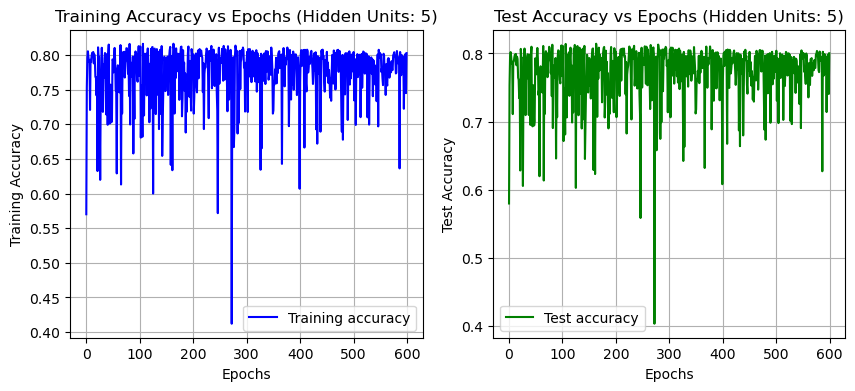

Accuray of NN model on test set: 0.9483 for hidden uints: 40


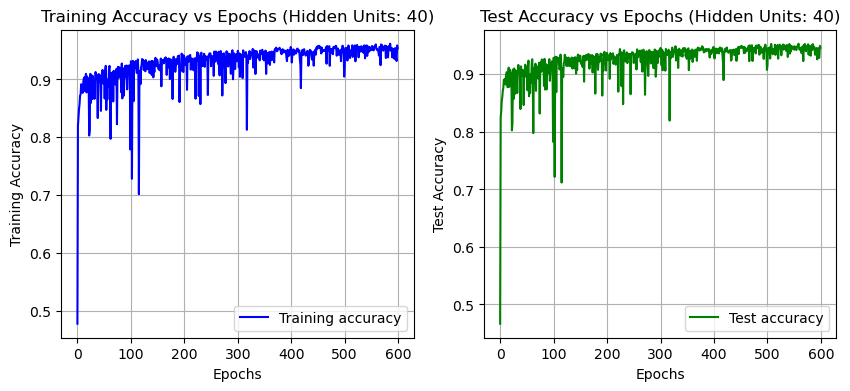

Accuray of NN model on test set: 0.9662 for hidden uints: 200


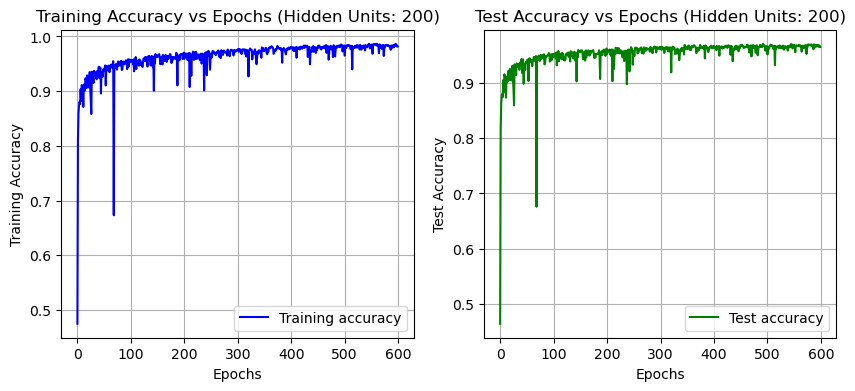

In [18]:
for b in [5, 40, 200]:
    layer_dims = [x_train.shape[0], b, 1]
    param, cost, accuracy = nn_model(x_train, y_train, x_test, y_test, layer_dims, num_iterations = 10, 
                                 mini_batch = 10, learning_rate = 0.001, activation='relu')
    y_hat = predict(param, x_test, activation='relu')
    accu = np.mean(y_hat == y_test)
    print('Accuray of NN model on test set:', accu, 'for hidden uints:', b)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(cost, color='blue', label='Training accuracy')
    ax1.set_title('Training Accuracy vs Epochs (Hidden Units: {})'.format(b))
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Training Accuracy')
    ax1.grid(True)
    ax1.legend()

    # plot the second subplot with accuracy data
    ax2.plot(accuracy, color='green', label='Test accuracy')
    ax2.set_title('Test Accuracy vs Epochs (Hidden Units: {})'.format(b))
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Test Accuracy')
    ax2.grid(True)
    ax2.legend()
    
    plt.show()

### Role of hidden units on ease of optimization and accuracy:
#### Optimization:
1. The number of parameters rises as the number of hidden units increases, as does the computing cost for optimization. However, this allows the model to better reflect complicated patterns, which improves the model's performance.
2. Having fewer hidden units reduces the number of parameters, which reduces the computing cost for optimization. However, the model may be unable to properly describe complicated patterns, resulting in poor model performance.

#### Accuracy:
1. Few hidden units may cause a high bias problem in which the model does not capture all data representations, resulting in underfitting and worse accuracy.
2. Each problem has an ideal number of hidden units, which is determined by the complexity of the data and the specific job at hand. This results in a model that can generalize to previously unknown data and performs at the level of a human.  
3. Increasing the number of hidden units beyond this optimum threshold may not enhance accuracy considerably and may potentially result in overfitting. As a result, the model memorizes the training data and is unable to generalize to train data, resulting in poor performance.

Accuray of NN model on test set: 0.9317 for hidden uints: 5


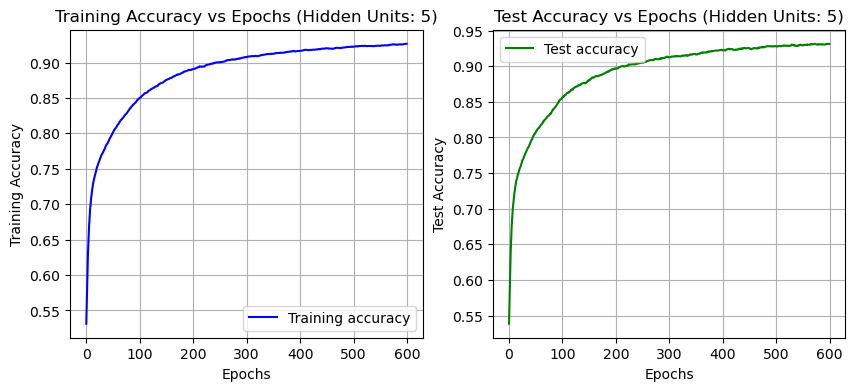

Accuray of NN model on test set: 0.9528 for hidden uints: 40


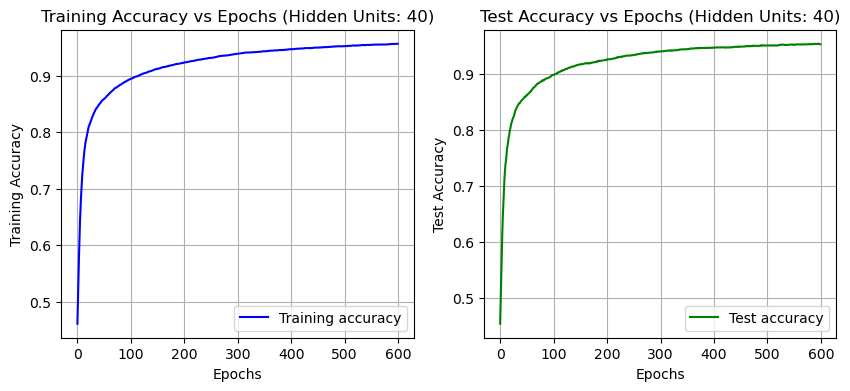

Accuray of NN model on test set: 0.9594 for hidden uints: 200


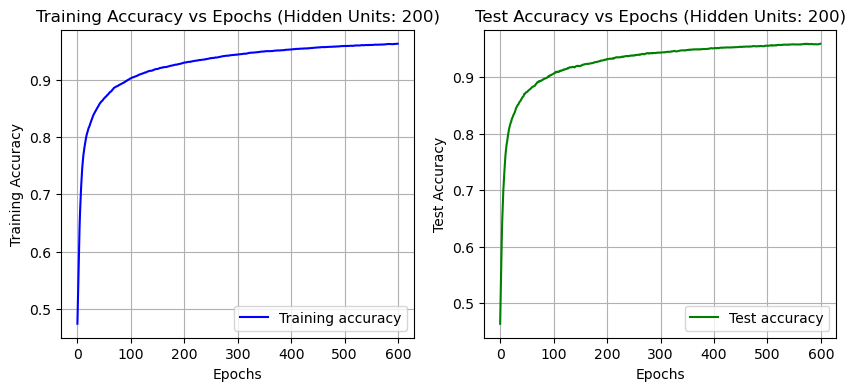

In [19]:
for b in [5, 40, 200]:
    layer_dims = [x_train.shape[0], b, 1]
    param, cost, accuracy = nn_model(x_train, y_train, x_test, y_test, layer_dims, num_iterations = 10, 
                                 mini_batch = 10, learning_rate = 0.00005, activation='sigmoid')
    y_hat = predict(param, x_test, activation='sigmoid')
    accu = np.mean(y_hat == y_test)
    print('Accuray of NN model on test set:', accu, 'for hidden uints:', b)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(cost, color='blue', label='Training accuracy')
    ax1.set_title('Training Accuracy vs Epochs (Hidden Units: {})'.format(b))
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Training Accuracy')
    ax1.grid(True)
    ax1.legend()

    # plot the second subplot with accuracy data
    ax2.plot(accuracy, color='green', label='Test accuracy')
    ax2.set_title('Test Accuracy vs Epochs (Hidden Units: {})'.format(b))
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Test Accuracy')
    ax2.grid(True)
    ax2.legend()
    
    plt.show()

### Difference between linear model and neural net:
#### Linear model:
1. Linear model assumes the linear relationship between the input and output data. It only learns the linear representations in the given data and apply linear transformation on the input data to produce output.
2. Linear models have lesser parameters which makes it computationally easy and easier to interrept and understand.
3. Linear models lack ability to perform automatic future extraction which is essential for capturing hidden complex patterns in the data.

#### Neural net:
1. Neural net can better capture the non-linear data representations between its inputs and outputs. By using activation functions and multiple hidden layers, neural networks can approximate complex functions and capture intricate patterns.
2. Neural nets have more parameters which makes it computationally expensive and difficult to interrupt its representations. 
3. Neural networks make use of activation functions to better learn hidden features automatically, which makes them more efficient in generelization to new data if the model is optimal.

### Differences between logistic and quadratic loss in terms of optimization and test/train accuracy:
#### Optimization:
1. Logistic loss is mostly used for binary classification problem where the output is probability between 0 and 1. It is designed to optimize the model parameters to maximize the likelihood of the observed binary labels. It penalizes the outliers by assigning it with minimum weight due to its logistic nature making it robust to outliers.
2. Quadratic loss is mostly used for regression tasks where we need to predict the continouse values. It measures the difference square of predicted and given values. As it squares the errors which leads to significant impact on the loss function it leads to more skewed performance which leads to biased predictions.

#### Accuracy:
1. Probabilities between 0 and 1 are output by the logistic loss, providing a suitable threshold for classification choices. Based on measures like accuracy, precision, recall, and F1-score, the final model can be assessed.
2. Although quadratic loss may not be simply interpreted as accuracy, it can offer insight into the overall goodness of fit. Mean absolute error (MAE), root mean square error (RMSE), and R-squared are evaluation metrics for regression problems.

### This is the implementation of optimizer according to mini_batch gradient descent.

In [20]:
def nn_model(X_train, Y_train, x_test, y_test, layer_dims, num_iterations = 10, mini_batch = 10,learning_rate = 0.01, activation='relu'):
    parameters = initialize_parameters(layer_dims)
    train_accuracy = []
    test_accuracy = []
    J = 0
    for i in range(0, num_iterations):
        mini_batches = initiallize_minibatch(X_train, Y_train, mini_batch)
        for mini_batch_x, mini_batch_y in mini_batches:
            A2, cache = forward_prop(mini_batch_x, parameters, activation)
            cost = cost_computation(A2, mini_batch_y, activation)
            grads = back_prop(parameters, cache, mini_batch_x, mini_batch_y, activation)
            parameters = update_parameters(parameters, grads, learning_rate)
            J = J + 1
            
            if J % 100 == 0:
                y_pred = predict(parameters, X_train, activation)
                acc = np.mean(y_pred == Y_train)
                train_accuracy.append(acc)
                
                y_hat = predict(parameters, x_test, activation)
                accuracy = np.mean(y_hat == y_test)
                test_accuracy.append(accuracy)
    return parameters, train_accuracy, test_accuracy


Accuray of NN model on test set: 0.7882 for hidden uints: 5


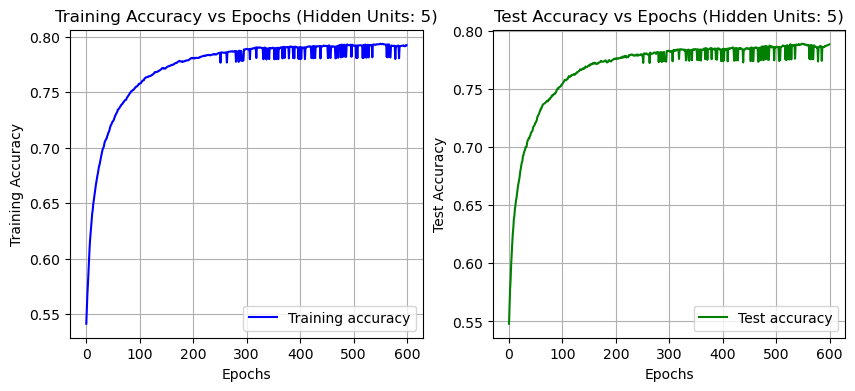

Accuray of NN model on test set: 0.902 for hidden uints: 40


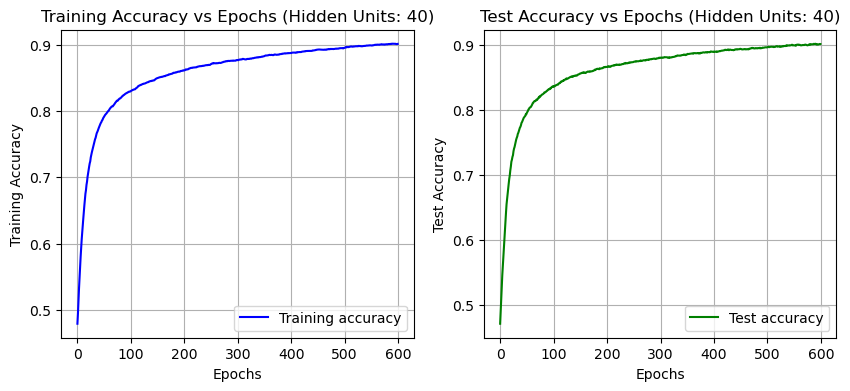

Accuray of NN model on test set: 0.9129 for hidden uints: 200


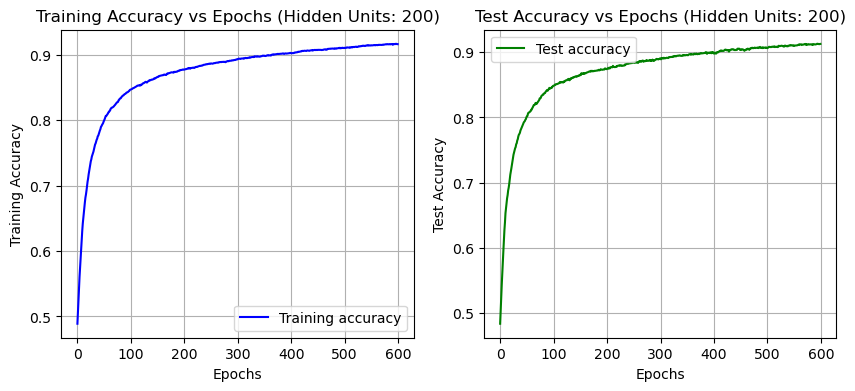

In [21]:
for b in [5, 40, 200]:
    layer_dims = [x_train.shape[0], b, 1]
    param, cost, accuracy = nn_model(x_train, y_train, x_test, y_test, layer_dims, num_iterations = 10, 
                                 mini_batch = 10, learning_rate = 0.0001, activation='relu')
    y_hat = predict(param, x_test, activation='relu')
    accu = np.mean(y_hat == y_test)
    print('Accuray of NN model on test set:', accu, 'for hidden uints:', b)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(cost, color='blue', label='Training accuracy')
    ax1.set_title('Training Accuracy vs Epochs (Hidden Units: {})'.format(b))
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Training Accuracy')
    ax1.grid(True)
    ax1.legend()

    # plot the second subplot with accuracy data
    ax2.plot(accuracy, color='green', label='Test accuracy')
    ax2.set_title('Test Accuracy vs Epochs (Hidden Units: {})'.format(b))
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Test Accuracy')
    ax2.grid(True)
    ax2.legend()
    
    plt.show()

Accuray of NN model on test set: 0.7342 for hidden uints: 5


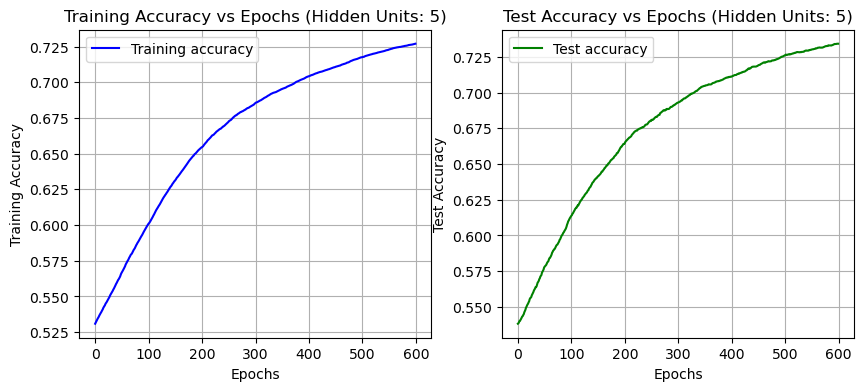

Accuray of NN model on test set: 0.7575 for hidden uints: 40


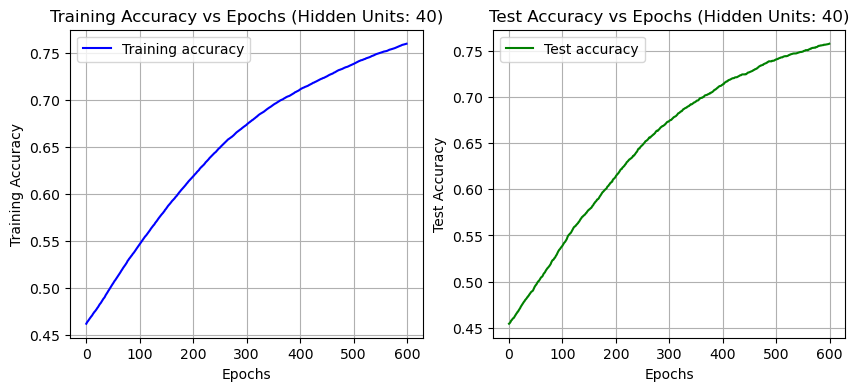

Accuray of NN model on test set: 0.7778 for hidden uints: 200


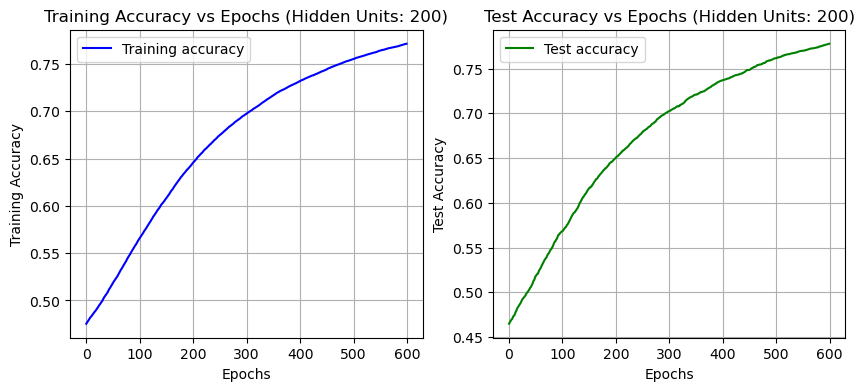

In [22]:
for b in [5, 40, 200]:
    layer_dims = [x_train.shape[0], b, 1]
    param, cost, accuracy = nn_model(x_train, y_train, x_test, y_test, layer_dims, num_iterations = 10, 
                                 mini_batch = 10, learning_rate = 0.00001, activation='sigmoid')
    y_hat = predict(param, x_test, activation='sigmoid')
    accu = np.mean(y_hat == y_test)
    print('Accuray of NN model on test set:', accu, 'for hidden uints:', b)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(cost, color='blue', label='Training accuracy')
    ax1.set_title('Training Accuracy vs Epochs (Hidden Units: {})'.format(b))
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Training Accuracy')
    ax1.grid(True)
    ax1.legend()

    # plot the second subplot with accuracy data
    ax2.plot(accuracy, color='green', label='Test accuracy')
    ax2.set_title('Test Accuracy vs Epochs (Hidden Units: {})'.format(b))
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Test Accuracy')
    ax2.grid(True)
    ax2.legend()
    
    plt.show()